In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 50)
Y_gt = 0.001 * (X **3 + X**2 + X)
Y = Y_gt + np.random.normal(0, 0.1, len(X))

poly = PolynomialFeatures(degree=30)
X_poly = poly.fit_transform(X[:, np.newaxis])

plt.figure(figsize=(10, 10))
plt.plot(X, Y_gt, color='gray')
plt.plot(X, Y, '.', color='k')
plt.show()

<Figure size 1000x1000 with 1 Axes>

No Regularization Model
[-87758965438085.688  593.256  2768.681 -449.326 -1058.219  25.635
  117.675  21.361  2.302 -4.594 -1.634  0.438  0.169 -0.025 -0.010  0.001
  0.000 -0.000 -0.000  0.000  0.000 -0.000 -0.000  0.000  0.000 -0.000
 -0.000  0.000  0.000 -0.000 -0.000]
L1
[ 0.000  95.572 -20.237  13.263  0.822 -0.089  0.000  0.000 -0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.000
 -0.000]
L2
[ 0.000  193.930  1.984  2.292  0.017  0.020  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000
 -0.000]


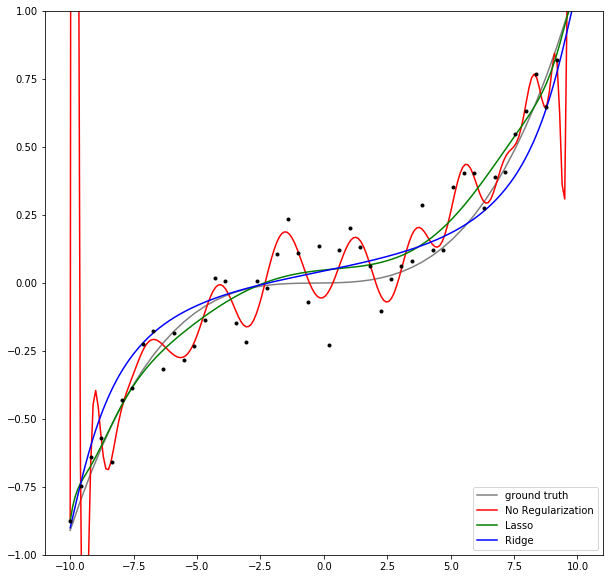

In [9]:
xs = np.linspace(-10, 10, 200)
from sklearn import linear_model

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

model_plain = linear_model.LinearRegression(normalize=True)
model_plain.fit(X_poly, Y)
Y_plain = model_plain.predict(poly.fit_transform(xs[:, np.newaxis]))
print('No Regularization Model')
print(model_plain.coef_ * 10000)

model_lasso = linear_model.LassoLars(normalize=True, alpha=0.00001)
model_lasso.fit(X_poly, Y)
Y_lasso = model_lasso.predict(poly.fit_transform(xs[:, np.newaxis]))
print('L1')
print(model_lasso.coef_ * 10000)

model_ridge = linear_model.Ridge(normalize=True, alpha=0.5)
model_ridge.fit(X_poly, Y)
Y_ridge = model_ridge.predict(poly.fit_transform(xs[:, np.newaxis]))
print('L2')
print(model_ridge.coef_ * 10000)

plt.figure(figsize=(10, 10))
p = plt.subplot()
p.plot(X, Y_gt, color='gray', label='ground truth')
p.plot(xs, Y_plain, color='r', markersize=2, label='No Regularization')
p.plot(xs, Y_lasso, color='g',  markersize=2, label='Lasso')
p.plot(xs, Y_ridge, color='b',  markersize=2, label='Ridge')
p.plot(X, Y, '.', color='k')
p.legend()
p.set_ylim(-1, 1)

plt.show()